In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/books and rating data/New_Ratings_Data_set/books_ratings.csv")

dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
len(dataset.user_id.unique()), len(dataset.book_id.unique())

dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.book_id.astype('category').cat.codes.values

dataset.head()

,book_id,user_id,rating
0,1,313,5
1,1,438,3
2,1,587,5
3,1,1168,4
4,1,1184,4


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.7)
train.head()

test.head()

,book_id,user_id,rating
504206,5056,43717,5
53877,539,43031,3
139515,1396,16586,4
77130,772,9671,4
183537,1836,37480,4


In [ ]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_book = len(dataset.user_id.unique()), len(dataset.book_id.unique())

In [ ]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_book = len(dataset.user_id.unique()), len(dataset.book_id.unique())

In [ ]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [ ]:
from keras.layers import Concatenate, Dense, Dropout
from keras import regularizers
from keras import losses
import tensorflow as tf


n_latent_factors_user = 5
n_latent_factors_book = 8

book_input = keras.layers.Input(shape=[1],name='Item')
book_embedding = keras.layers.Embedding(n_book + 1, n_latent_factors_book, name='book-Embedding')(book_input)
book_vec = keras.layers.Flatten(name='Flattenbook')(book_embedding)
book_vec = keras.layers.Dropout(0.2)(book_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
user_vec = keras.layers.Dropout(0.2)(user_vec)



concat = Concatenate()([book_vec,user_vec])
dense_1 = keras.layers.Dense(256,name='FullyConnected_1', activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat)
dense_2 = keras.layers.Dense(128,name='FullyConnected_2', activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_1)
dense_3 = keras.layers.Dense(64,name='FullyConnected_3', activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_2)
dense_4 = keras.layers.Dense(32,name='FullyConnected_4', activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_3)

dense_5 = keras.layers.Dense(16,name='FullyConnected_5', activation='relu')(dense_4)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_5)
adam = Adam(lr=0.00146)
model = keras.Model([user_input, book_input], result)
model.compile(optimizer=adam, loss=tf.keras.losses.Huber(), metrics=['accuracy'])

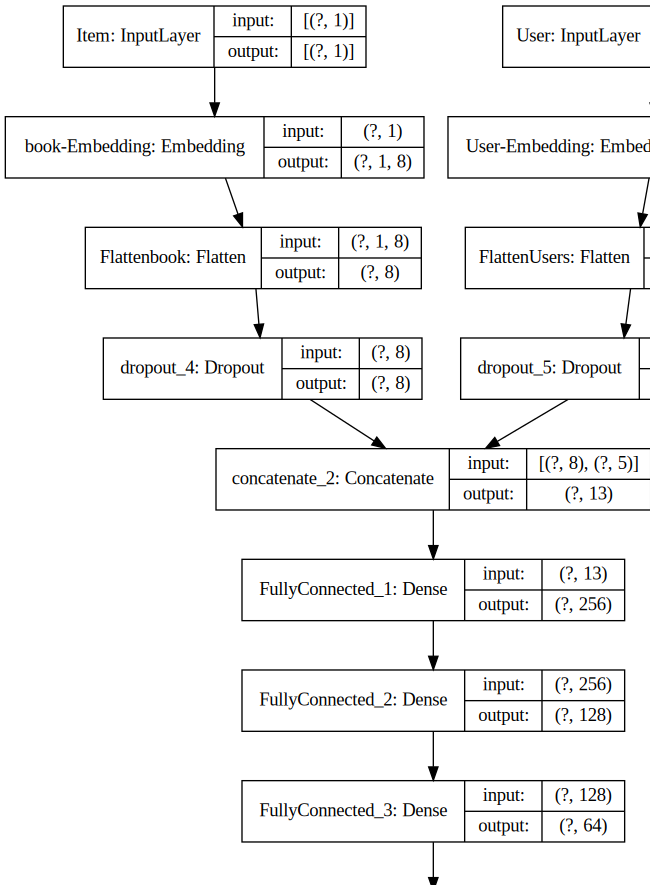

In [ ]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))


In [ ]:
model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
book-Embedding (Embedding)      (None, 1, 8)         80008       Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         267125      User[0][0]                       
_______________________________________________________________________________________

In [ ]:


history = model.fit([train.user_id, train.book_id], train.rating, epochs=20,verbose=1, batch_size=40000 )

NameError: ignored

In [ ]:
y_hat = np.round(model.predict([test.user_id, test.book_id]),0)
y_true = test.rating

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_hat)

0.897773671114474

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_true, y_hat)

0.6377180856481818